In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

%load_ext sql
%sql sqlite:///Event.sqlite

In [3]:
cnx = sqlite3.connect(r'Event.sqlite')

In [11]:
sql_cmd = """

WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="PyMeeus"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_pm_th = pd.read_sql_query(sql_cmd, cnx)

In [8]:
sql_cmd = """
WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="Uncorrected (PyMeeus)"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_un_th = pd.read_sql_query(sql_cmd, cnx)

In [13]:
sql_cmd = """
WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="Time corrected (PyMeeus)"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_tc_th = pd.read_sql_query(sql_cmd, cnx)

In [14]:
sql_cmd = """
WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="Elliptical + Time corrected (PyMeeus)"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_elltc_th = pd.read_sql_query(sql_cmd, cnx)


In [15]:
sql_cmd = """
WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="Apparent moon radius + Elliptical + Time corrected (PyMeeus)"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_apelltc_th = pd.read_sql_query(sql_cmd, cnx)

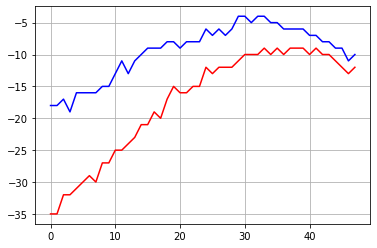

In [31]:

df_1= df_elltc_th[((df_elltc_th.Satellite == 2)&(df_elltc_th.Type1 == 'EC')&(df_elltc_th.Type2 == 'F')&(df_elltc_th.Type3 == 'INT'))].deltaTime

plt.plot(df_1.to_numpy(), "r")

df_2= df_tc_th[((df_tc_th.Satellite == 2)&(df_tc_th.Type1 == 'EC')&(df_tc_th.Type2 == 'F')&(df_tc_th.Type3 == 'EXT'))].deltaTime

plt.plot(df_2.to_numpy(), "b")

plt.grid()